(b) Compute normalized 5×5 DoG kernels (σ = 2)

In [1]:
import numpy as np

def gaussian_derivative_kernel(size, sigma, direction="x"):
    k = size // 2
    kernel = np.zeros((size, size), dtype=np.float32)

    for i in range(-k, k+1):
        for j in range(-k, k+1):
            G = np.exp(-(i**2 + j**2) / (2 * sigma**2))
            if direction == "x":
                kernel[i+k, j+k] = -i / (sigma**2) * G
            else:
                kernel[i+k, j+k] = -j / (sigma**2) * G

    # Normalize (L1 norm)
    kernel /= np.sum(np.abs(kernel))
    return kernel

dog_x = gaussian_derivative_kernel(5, sigma=2, direction="x")
dog_y = gaussian_derivative_kernel(5, sigma=2, direction="y")

print("DoG Kernel (x-direction):\n", dog_x)
print("DoG Kernel (y-direction):\n", dog_y)


DoG Kernel (x-direction):
 [[ 0.04413011  0.06420892  0.07275824  0.06420892  0.04413011]
 [ 0.03210446  0.04671172  0.05293131  0.04671172  0.03210446]
 [ 0.          0.          0.          0.          0.        ]
 [-0.03210446 -0.04671172 -0.05293131 -0.04671172 -0.03210446]
 [-0.04413011 -0.06420892 -0.07275824 -0.06420892 -0.04413011]]
DoG Kernel (y-direction):
 [[ 0.04413011  0.03210446  0.         -0.03210446 -0.04413011]
 [ 0.06420892  0.04671172  0.         -0.04671172 -0.06420892]
 [ 0.07275824  0.05293131  0.         -0.05293131 -0.07275824]
 [ 0.06420892  0.04671172  0.         -0.04671172 -0.06420892]
 [ 0.04413011  0.03210446  0.         -0.03210446 -0.04413011]]


(c) Visualize 51×51 DoG kernel as a 3D surface

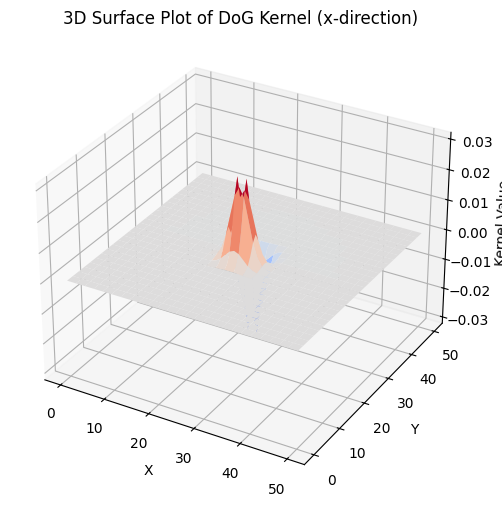

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

dog_51 = gaussian_derivative_kernel(51, sigma=2, direction="x")

x = np.arange(51)
y = np.arange(51)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, dog_51, cmap='coolwarm')
ax.set_title("3D Surface Plot of DoG Kernel (x-direction)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Kernel Value")

plt.show()


(d) Apply DoG kernels to obtain image gradients

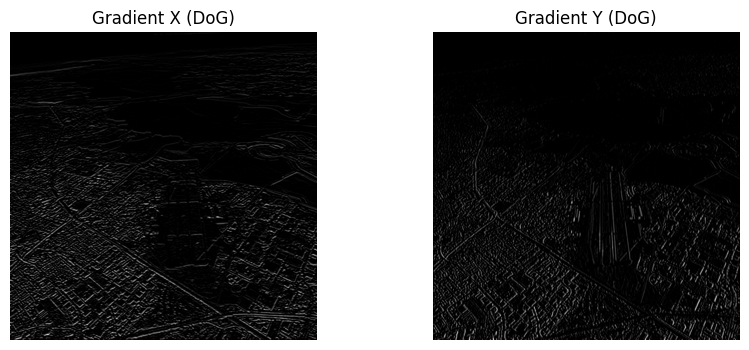

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load grayscale image
image_path = "../data/original/runway.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Image not found")

# Apply derivative-of-Gaussian filtering
grad_x_dog = cv2.filter2D(img, -1, dog_x)
grad_y_dog = cv2.filter2D(img, -1, dog_y)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(grad_x_dog, cmap='gray')
plt.title("Gradient X (DoG)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(grad_y_dog, cmap='gray')
plt.title("Gradient Y (DoG)")
plt.axis("off")

plt.show()


(e) Compute gradients using OpenCV Sobel & compare

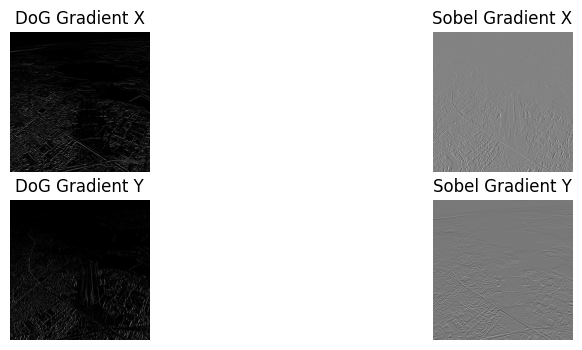

In [4]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

plt.figure(figsize=(10,4))

plt.subplot(2,2,1)
plt.imshow(grad_x_dog, cmap='gray')
plt.title("DoG Gradient X")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel Gradient X")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(grad_y_dog, cmap='gray')
plt.title("DoG Gradient Y")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Gradient Y")
plt.axis("off")

plt.show()
